## E-commerce Customer Dataset

In [10]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("Ecommerce_Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

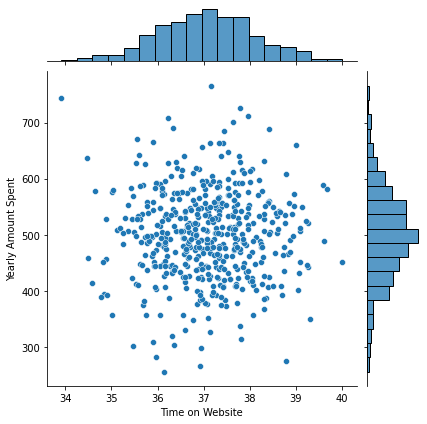

In [5]:
## COMPARING TIME ON WEBSITE VS YEARLY AMOUNT
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')


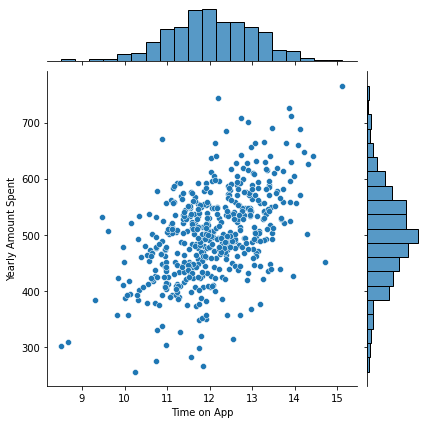

In [6]:
## COMPARING TIME ON APP VS YEARLY AMOUNT
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent')

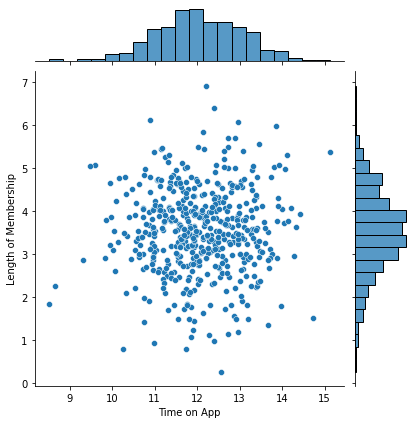

In [6]:
## TIME ON APP VS LENGTH OF MEMBERSHIP
sns.jointplot(data=df,x='Time on App',y='Length of Membership')


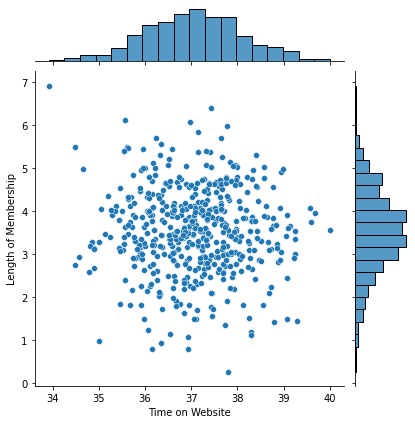

In [9]:
## TIME ON WEBSITE VS LENGTH OF MEMBERSHIP
sns.jointplot(data=df,x='Time on Website',y='Length of Membership')

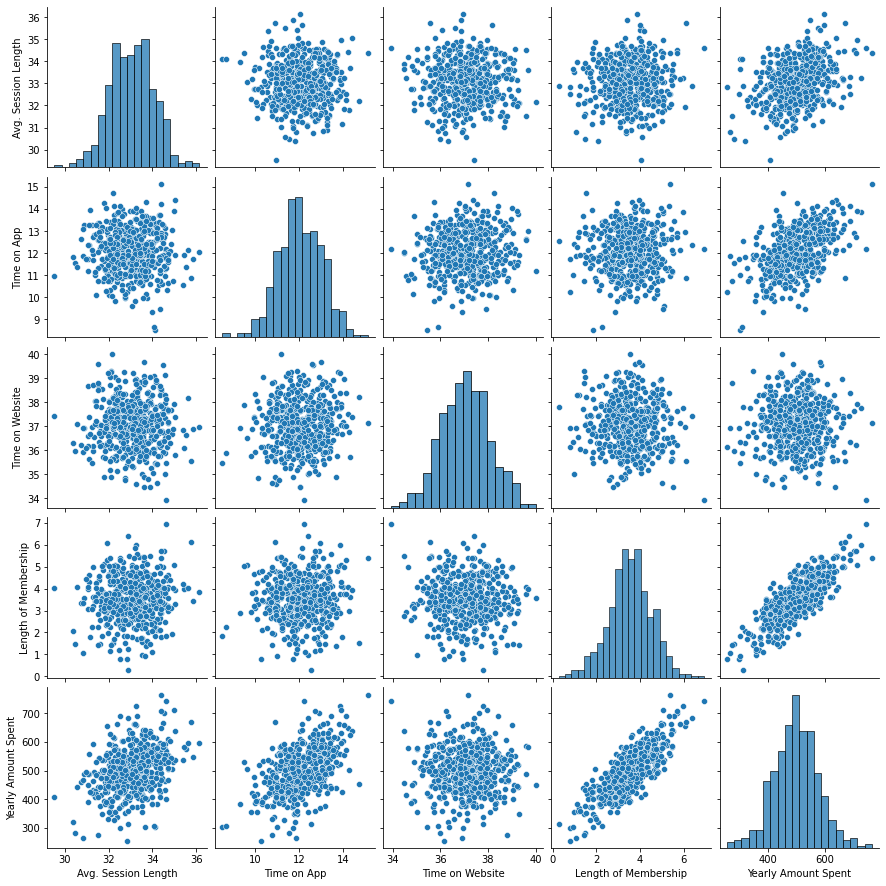

In [11]:
##VISUALIZING ON A WHOLE PAIRWISE
sns.pairplot(df)

 #### THIS SHOWS THAT THE LENGTH OF MEMBERSHIP IS COREELATED WITH THE YEARLY AMOUNT SPENT, SO WE CAN DRAW INSIGHTS BETWEEN THESE TWO WITH LINEAR REGRESSION

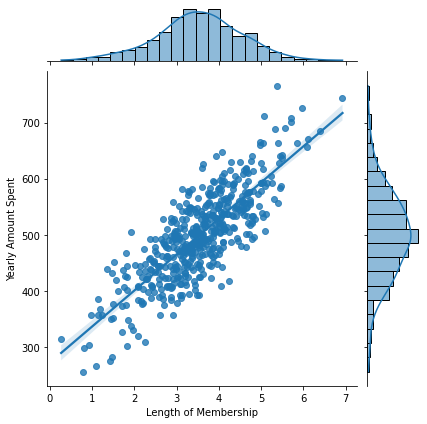

In [13]:
sns.jointplot(data=df,x='Length of Membership',y='Yearly Amount Spent',kind='reg')

#### NOW WE ARE TRYING TO ESTIMATE THE YEARLY AMOUNT SPENT BASED ON ALL THE NUMERICAL VARIABLES WE HAVE IN OUR DATASET

In [11]:
x=df[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']

## IMPORTING A LINEAR REGRESSOR AND DOING TEST TRAIN SPLIT

In [12]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

### TRAINING THE MODEL USING TRAINING DATA


In [13]:
model.fit(x_train,y_train)

LinearRegression()

### PREDICTING THE OUTCOMES FROM THE TRAINED MODEL USING THE TEST DATA

In [14]:
##PREDICTIONS
prediction=model.predict(x_test)
prediction

array([372.25115155, 472.98392288, 535.69829753, 513.29269465,
       438.32104347, 443.3545779 , 466.96760743, 531.45446346,
       451.56871122, 497.81132465, 684.1707857 , 676.43344652,
       450.68286213, 496.58529646, 500.4844499 , 396.21564192,
       576.34608052, 411.91821979, 577.80879593, 572.87753165,
       466.19417821, 656.98962268, 430.81910182, 495.79837337,
       591.50680854, 621.2443618 , 475.69059032, 416.91637454,
       456.44870758, 347.9346602 , 515.20064602, 534.80609394,
       534.05846355, 460.07141926, 542.94422124, 608.0150811 ,
       550.97736073, 490.78194011, 501.84585693, 604.40387885,
       389.21349016, 552.35958505, 387.31211029, 623.41806362,
       355.23852894, 508.15426796, 528.82499932, 593.52408383,
       563.44549044, 440.87339923, 606.54865255, 414.81703534,
       315.52585604, 525.66181852, 424.52038174, 464.13912272,
       434.71388972, 463.63885455, 409.55636284, 535.92337682,
       478.04851052, 492.77467375, 486.2610753 , 416.99

### VISUALIZING THE REAL VALUES VS PREDICTED VALUES

Text(0.5, 0, 'Y_test(Actual Values)')

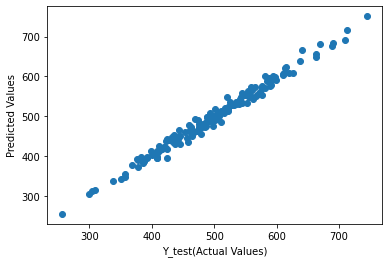

In [15]:
plt.scatter(y_test,prediction)
plt.ylabel('Predicted Values')
plt.xlabel('Y_test(Actual Values)')

### EAVLUATING OUR MODEL MATHEMATICALLY USING PERFORMANCE METRICS FOR LINEAR REGRESSION

#### PERFORMANCE METRICS FOR LINEAR REGRESSION
1) MEAN ABSOLUTE ERROR

2) MEAN SQUARED ERROR

3) ROOT MEAN SQUARED ERROR


In [16]:
from sklearn import metrics
mae=metrics.mean_absolute_error(prediction,y_test)
mse=metrics.mean_squared_error(prediction,y_test)
rmse=np.sqrt(metrics.mean_squared_error(prediction,y_test))
r_sq=metrics.r2_score(prediction,y_test)
print("The MEAN ABSOLUTE ERROR is    ",mae)
print("The MEAN SQUARED ERROR is     ",mse)
print("The ROOT MEAN SQUARED ERROR is",rmse)
print("The R-SQUARED value is        ",r_sq)

The MEAN ABSOLUTE ERROR is     8.218696007403494
The MEAN SQUARED ERROR is      110.05732978825928
The ROOT MEAN SQUARED ERROR is 10.49082121610407
The R-SQUARED value is         0.9848272521976037


### ANALYSING RESIDUES

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

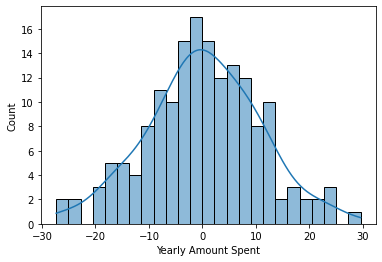

In [17]:
sns.histplot((y_test-prediction),bins=25,kde=True)

### DRAWING CONCLUSIONS ON THE DATA


In [18]:
cdf=pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
cdf

,Coefficient
Avg. Session Length,25.920532
Time on App,38.708220
Time on Website,0.800375
Length of Membership,61.285410


In [20]:
from sklearn.model_selection import cross_val_score
acc=model.score(x_test,y_test)
print("THE ACCURACY OF THE MODEL IS:",acc*100)

THE ACCURACY OF THE MODEL IS: 98.52171516851038


## CONCLUSIONS
### 1) PEOPLE ARE USING THE APP VERSION RATHER THAN THE WEBSITE.
### 2) COMPANY MUST FOCUS MORE ON DEVELPOING THE WEBSITE BEACUSE, ITS VIEW RATE IS LESS COMPARED TO APP.
### 3) IN OTHER WAY COMPANY CAN FOCUS ON INCORPORATING MORE FEATURES IN THE APP, BECAUSE IT'S GOT MORE BUSINESS THERE
### 4) PEOPLE WITH MORE LENGTH OF MEMBERSHIP TEND TO PURCHASE MORE PRODUCTS FROM THE COMPANY, SO IT'S BETTER TO MAKE THE CUSTOMER EXTEND THEIR MEMBERSHIP FOR A MORE PERIOD OF TIME INORDER TO MAKE MORE BUSINESS.